In [1]:
import tweepy

In [2]:
import os
from dotenv import load_dotenv

In [3]:
from time import sleep
from datetime import datetime
from textblob import TextBlob
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
load_dotenv()

# Accede a la variable de entorno api_key
api_key = os.environ.get("api_key")
api_secret_key=os.environ.get("api_secret_key")
access_token=os.environ.get("Access_Token")
access_token_secret= os.environ.get("Access_Token_Secret")


In [5]:
# Autenticación con la API v1 de Twitter
auth = tweepy.OAuth1Handler(api_key,api_secret_key)
auth.set_access_token(access_token,access_token_secret)
api= tweepy.API(auth)

In [6]:
auth = tweepy.OAuth1UserHandler(api_key, api_secret_key, access_token, access_token_secret)
api = tweepy.API(auth)

In [7]:
print(api.verify_credentials().name)

Patricia Carrasco


In [8]:
user = api.verify_credentials()
print("¡Autorización exitosa!")
print("Nombre de usuario:", user.screen_name)
print("Nombre real:", user.name)
print("ID de usuario:", user.id)

¡Autorización exitosa!
Nombre de usuario: carrasco_patri
Nombre real: Patricia Carrasco
ID de usuario: 396585732


## Polaridad

[>0.2]-> Sentimiento Positivo

[-0.2,0.2] -> Sentimiento Neutro

[<-0.2] -> Sentimiento Negativo

### Insertar término de búsqueda para el Análisis de Sentiemiento

In [11]:
# Se pregunta por la palabra a preguntar
palabra = input("Buscar: ")

Buscar:  Kate Middleton


In [22]:
# Se define la cantidad de tweets a capturar
num_tweets = int(input("Número de tweets a capturar: "))

Número de tweets a capturar:  50


In [17]:
#Se define el idioma de los tweets a analizar
lenguaje = input("Idioma [es/en]: ")

Idioma [es/en]:  en


## Análisis de Sentimiento con TextBlob

In [30]:
def getTweets(palabra,num_tweets,lenguaje,api):
    #se define las listas que captura la popularidad
    polaridad_list = []
    numeros_list = []
    numero = 1
    # Realizar la búsqueda de tweets utilizando la API v1
    tweets = api.search_tweets(q=palabra, lang=lenguaje, count=num_tweets)
    for tweet in tweets:
        try:
            # Realizar el análisis de sentimiento
            analisis = TextBlob(tweet.text)
            polaridad = analisis.sentiment.polarity

             # Agregar los resultados a las listas
            polaridad_list.append(polaridad)
            numeros_list.append(numero)
            numero = numero + 1 
        except tweepy.TweepError as e:
            print (e.reason)
        except StopIteration:
            break
        return(numeros_list,polaridad_list,numero)


### Visualizar Sentimiento y Categorizar

In [31]:
numeros_list,polaridad_list,numero = getTweets(palabra,num_tweets,lenguaje,api)

Forbidden: 403 Forbidden
453 - You currently have access to a subset of Twitter API v2 endpoints and limited v1.1 endpoints (e.g. media post, oauth) only. If you need access to this endpoint, you may need a different access level. You can learn more here: https://developer.twitter.com/en/portal/product

In [ ]:
print(numeros_list,polaridad_list,numero )

### No permiso
Al dar ese error, voy a hacer el estudio con un dataset de kaggle: https://www.kaggle.com/datasets/bhavikjikadara/tweets-dataset

In [15]:
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('./data/tweets.csv',encoding='latin')

In [3]:
df.head()

,Target,ID,Date,flag,User,Text
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [9]:
df.shape

(1048575, 6)

In [22]:
def getTweets(df,num_elementos):
    #se define las listas que captura la popularidad
    polaridad_list = []
    numeros_list = []
    numero = 1
    # Limitar el número de elementos del DataFrame
    df_limitado = df.head(num_elementos)
    
    for tweet in df_limitado['Text']:
        analisis = TextBlob(tweet)
        polaridad = analisis.sentiment.polarity
        # Agregar los resultados a las listas
        polaridad_list.append(polaridad)
    df_polaridades = pd.DataFrame({'Polaridad': polaridad_list})
    return  df_polaridades

In [29]:
df_polaridad = getTweets(df,10000)

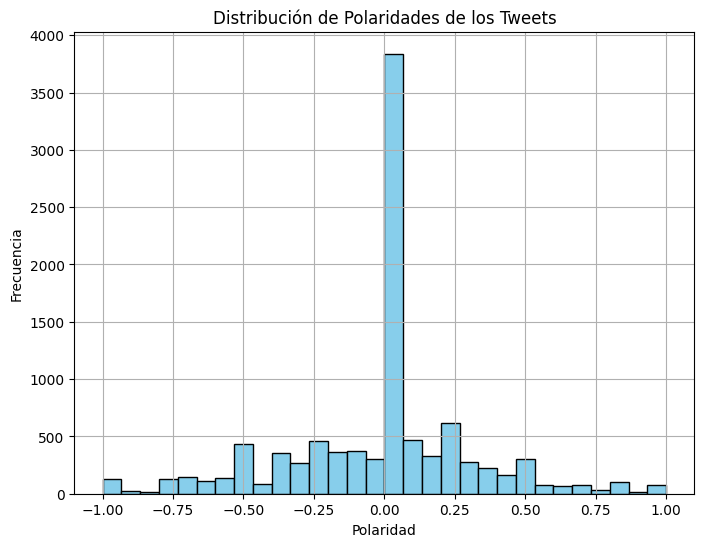

In [30]:
# Graficar las polaridades
plt.figure(figsize=(8, 6))
plt.hist(df_polaridad['Polaridad'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Polaridad')
plt.ylabel('Frecuencia')
plt.title('Distribución de Polaridades de los Tweets')
plt.grid(True)
plt.show()